In [1]:
cd

C:\Users\jerem\Documents\Labor Economics\dofiles


In [2]:
// log using "..\log\empirical_exercise12.smcl", replace

In [3]:
/****************************************************************************
* File name: empirical_exercise12.do
* Author(s): Sze, J.
* Date: 5/14/2019
* Description: 
* Answers to empirical exercise 12 for Labor Economics
*
* Inputs: 
* "..\input_data\Small CPS, 2018"
* "..\input_data\Twins Wide.dta"
* Outputs:
* 
***************************************************************************/

Your task is to estimate and compare log wages at various percentiles of its distribution using
the “Small CPS, 2018” Stata file. Use the earnings weighting variable weight to weight all
your estimates.

Create a categorical variable ed to classify workers into three schooling groups based on highest
grade completed: 
1. high school dropouts and graduates, 
2. college attendees and graduates,
3. those with advanced degrees.

In [4]:
use "..\input_data\Small CPS, 2018", clear

(1000 Obs./Month Extract of the CPS Merged-Outgoing-Rotation-Group Files, 2018)


In [5]:
describe


Contains data from ..\input_data\Small CPS, 2018.dta
  obs:        11,000                          1000 Obs./Month Extract of the CPS Merged-Outgoing-Rotation-Group Files, 2018
 vars:            22                          17 Jan 2019 14:16
 size:       484,000                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
idcode          int     %9.0g               * ID Code
weight          double  %7.1f              

In [6]:
tab grade,m


    highest |
      grade |
  completed |      Freq.     Percent        Cum.
------------+-----------------------------------
        1.4 |         16        0.15        0.15
        2.5 |         38        0.35        0.49
        6.5 |        151        1.37        1.86
          9 |        113        1.03        2.89
         10 |        149        1.35        4.25
         11 |        254        2.31        6.55
         12 |      2,827       25.70       32.25
         13 |      1,883       17.12       49.37
         14 |      1,241       11.28       60.65
         16 |      2,692       24.47       85.13
         18 |      1,636       14.87      100.00
------------+-----------------------------------
      Total |     11,000      100.00


In [7]:
gen ed = 0 if grade <= 12
replace ed = 1 if missing(ed) & grade <= 16
replace ed = 2 if missing(ed) & grade > 16


(7,452 missing values generated)

(5,816 real changes made)

(1,636 real changes made)


In [8]:
label define ed_ 0 "high school dropouts and graduates" 1 "college attendees and graduates" 2 "advanced degrees"
label values ed ed_

In [9]:
tab grade ed 


   highest |
     grade |                ed
 completed | high scho  college a  advanced  |     Total
-----------+---------------------------------+----------
       1.4 |        16          0          0 |        16 
       2.5 |        38          0          0 |        38 
       6.5 |       151          0          0 |       151 
         9 |       113          0          0 |       113 
        10 |       149          0          0 |       149 
        11 |       254          0          0 |       254 
        12 |     2,827          0          0 |     2,827 
        13 |         0      1,883          0 |     1,883 
        14 |         0      1,241          0 |     1,241 
        16 |         0      2,692          0 |     2,692 
        18 |         0          0      1,636 |     1,636 
-----------+---------------------------------+----------
     Total |     3,548      5,816      1,636 |    11,000 


### A. summarize with detail. 
Use the detail option with summarize to compute key percentiles of the log-wage distribution by ed.

In [10]:
gen lwage = log(wage)

Descriptive statistics by high school dropouts and graduates

In [11]:
sum lwage if ed == 0, detail


                            lwage
-------------------------------------------------------------
      Percentiles      Smallest
 1%     4.276666       2.995732
 5%     5.010635       3.138533
10%     5.393628       3.367296       Obs               3,548
25%     5.940171       3.401197       Sum of Wgt.       3,548

50%     6.357704                      Mean           6.311049
                        Largest       Std. Dev.      .7273273
75%     6.763169       8.372398
90%     7.154615       8.372398       Variance        .529005
95%     7.377759       8.372398       Skewness      -.3722657
99%     8.372398       8.372398       Kurtosis       4.142486


Descriptive statistics by college attendees and graduates

In [12]:
sum lwage if ed == 1, detail


                            lwage
-------------------------------------------------------------
      Percentiles      Smallest
 1%     4.564348       3.218876
 5%     5.298317       3.295837
10%     5.703783       3.401197       Obs               5,816
25%     6.247849       3.649619       Sum of Wgt.       5,816

50%     6.717684                      Mean           6.690946
                        Largest       Std. Dev.      .7757797
75%     7.205004       8.372398
90%      7.58148       8.372398       Variance       .6018342
95%     7.824046       8.372398       Skewness      -.3747449
99%     8.372398       8.372398       Kurtosis        3.77801


Descriptive statistics by those with advanced degrees

In [13]:
sum lwage if ed == 2, detail


                            lwage
-------------------------------------------------------------
      Percentiles      Smallest
 1%     4.930582       3.831897
 5%     5.857933       4.419683
10%     6.357704       4.525044       Obs               1,636
25%     6.878427        4.60517       Sum of Wgt.       1,636

50%       7.2874                      Mean           7.259012
                        Largest       Std. Dev.      .7600997
75%     7.712164       8.372398
90%     8.372398       8.372398       Variance       .5777516
95%     8.372398       8.372398       Skewness      -.7011723
99%     8.372398       8.372398       Kurtosis       4.036909


### B. pctile. 
Use the pctile with nquantiles(100) to compute the log wage at each percentile of the log-wage distribution. Do this separately for each education group. You should end up with a data set with 99 observations and four variables: percentile plus one variable for each education group. (The pctile command is dirty. If doesn’t create a new data set; it adds a variable to the current data set, but the new observations don’t match the existing observations. So drop the original variables and the thousands of irrelevant observations, and create the percentile variable.) 
* Plot the relationship between the log wage and the percentile separately for each education group. These are inverses of the empirical cumulative distribution functions.

In [14]:
pctile wage_hs = lwage if ed ==0 [weight = weight], nquantiles(100) genp(percentage)

(analytic weights assumed)


In [15]:
label variable wage_hs "Lwage for high school"

In [16]:
pctile wage_cl = lwage if ed ==1 [weight = weight], nquantiles(100) genp(pc_cl)

(analytic weights assumed)


In [17]:
label variable wage_cl "Lwage for college"

In [18]:
pctile wage_ad = lwage if ed ==2 [weight = weight], nquantiles(100) genp(pc_ad)

(analytic weights assumed)


In [19]:
label variable wage_ad "Lwage for Advance degree"

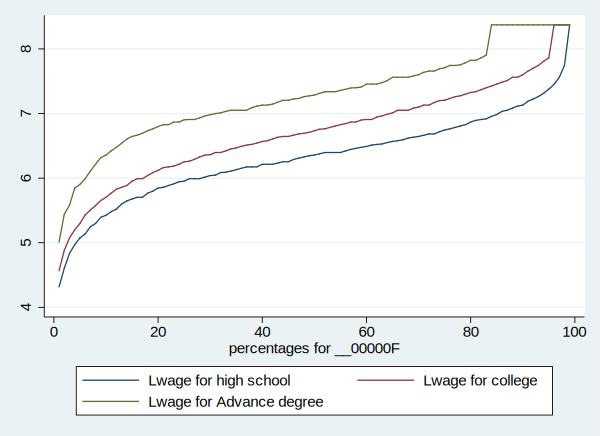

In [20]:
twoway line wage_hs percentage || line wage_cl percentage || line wage_ad percentage if !missing(percentage)

### C. collapse. 
Restore the original data set. By ed, collapse the log-wage variable to generate log wages at the 10th, 50th, and 90th percentiles of the distribution; also, generate the mean of log wages. Generate the 90–10, 50–10, and 90–50 splits (i.e., percentile differences). On one graph, plot how the three splits vary with education. Does wage inequality increase or decrease with education? Does inequality at the bottom or top of the distribution drive the pattern?

In [21]:
collapse (p10) p10_lwage=lwage  (p50) p50_lwage=lwage (p90) p90_lwage = lwage (mean) m_lwage=lwage [weight = weight], by(ed)

(analytic weights assumed)


In [23]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          ed |          3           1           1          0          2
   p10_lwage |          3    5.828695      .47893   5.424598   6.357704
   p50_lwage |          3    6.791975    .4663259   6.357704   7.284821
   p90_lwage |          3      7.7014    .6268213   7.130899   8.372398
     m_lwage |          3    6.763529    .4785055   6.319302   7.270185


In [24]:
gen delta_9010 = p90_lwage - p10_lwage
gen delta_5010 = p50_lwage - p10_lwage
gen delta_9050 = p90_lwage - p50_lwage

In [25]:
%browse

,ed,p10_lwage,p50_lwage,p90_lwage,m_lwage,delta_9010,delta_5010,delta_9050
1,high school dropouts and graduates,5.4245977,6.3577037,7.130899,6.3193021,1.7063012,.93310595,.77319527
2,college attendees and graduates,5.7037826,6.7334018,7.6009026,6.7011013,1.89712,1.0296192,.86750078
3,advanced degrees,6.3577037,7.284821,8.3723984,7.270185,2.0146947,.92711735,1.0875773


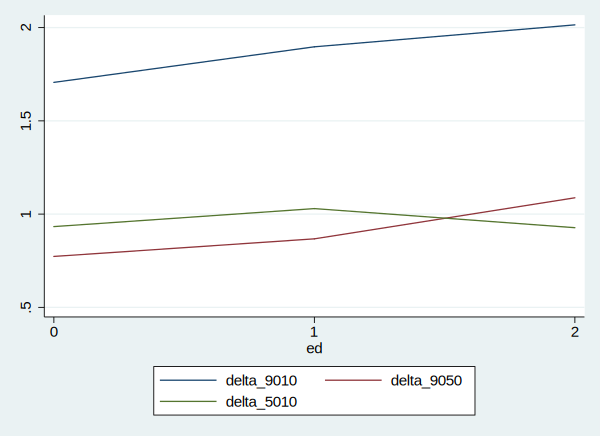

In [30]:
twoway line delta_9010 ed || line delta_9050 ed || line delta_5010 ed, xlabel(0 1 2)

Wage inequality increases with education. We can see the blue line, which represents the 90-10 split is larger with advanced degrees compared with high school degrees. The inequality at the top with 90-50 split increases with more education. 